In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv('quotes_with_length.csv')
df.head()

,Author,Quote,Tag,length_of_quote
0,Albert Einstein,"""The world as we have created it is a process ...",change,115
1,Albert Einstein,"""The world as we have created it is a process ...",deep-thoughts,115
2,Albert Einstein,"""The world as we have created it is a process ...",thinking,115
3,Albert Einstein,"""The world as we have created it is a process ...",world,115
4,J.K. Rowling,"""It is our choices, Harry, that show what we t...",abilities,85


- Display basic statistics about the dataset (e.g., missing values, unique authors, number of tags, etc.).
2. Data Visualization
- Bar chart of the top 10 most quoted authors.
- Word cloud of the most common words in the quotes.
- Pie chart showing the proportion of top 5 tags.
- Any other creative visualization that helps understand the dataset.

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Author           232 non-null    object
 1   Quote            232 non-null    object
 2   Tag              232 non-null    object
 3   length_of_quote  232 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 7.4+ KB


In [4]:
df.isnull().sum()

Author             0
Quote              0
Tag                0
length_of_quote    0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Insights:-
- No missing values.
- No duplicates found.

In [6]:
df['Author'].nunique()

49

In [18]:
df['Quote'].nunique()

97

In [7]:
df['Tag'].nunique()

137

### Insights:-
- The dataset contains quotes from 50 different authors and 137 unique thematic tags.
- Suggests a good variety in perspectives and topics.

## Data Visualization

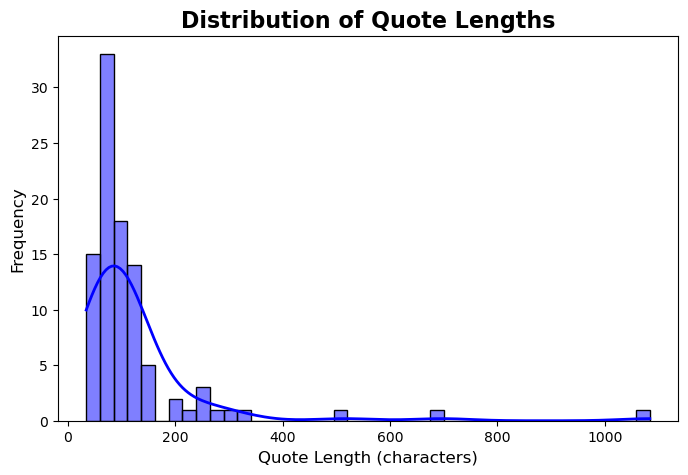

In [8]:
# Distributig lengths of quotes
lengths_with_spaces = [len(quote) for quote in df['Quote'].unique()] #unique(), because quotes are repeated.
plt.figure(figsize=(8, 5))
sns.histplot(data=lengths_with_spaces, kde=True, color="blue", edgecolor="black", line_kws={"linewidth": 2})
plt.title("Distribution of Quote Lengths", fontsize=16, fontweight='bold')
plt.xlabel("Quote Length (characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### Insights:-
- Majority of quotes are short to medium in length.
- Right skew implies that long quotes are rare but present.
- Ideal for short-read formats like social media captions, slides, etc.

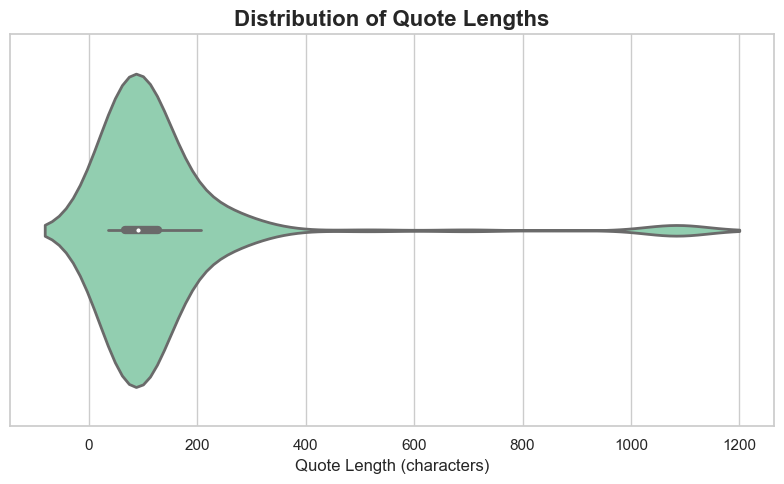

In [11]:
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['length_of_quote'], color="#88d8b0", linewidth=2) 

plt.title("Distribution of Quote Lengths", fontsize=16, fontweight='bold')
plt.ylabel("", fontsize=12)
plt.xlabel("Quote Length (characters)")
plt.tight_layout()
plt.show()

### Insights:-
- The central part (most common lengths) is tightly clustered.
- The long tail hints at outliers — verbose quotes.

<Figure size 800x500 with 0 Axes>

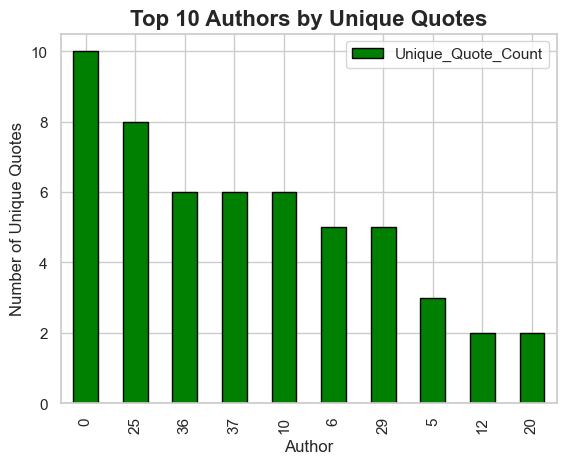

In [12]:
# 10 most quotes authors.
top_10_authors=df.groupby('Author')['Quote'].nunique().reset_index(name='Unique_Quote_Count').sort_values(by='Unique_Quote_Count', ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_10_authors.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Author', fontsize=12)
plt.ylabel('Number of Unique Quotes', fontsize=12)
plt.title('Top 10 Authors by Unique Quotes', fontsize=16, fontweight='bold')
plt.show()

### Insights
- Albert Einstein is the most quoted in this dataset — shows his influence or popularity in philosophical/reflective quotes.
- The presence of public figures like Marilyn Monroe suggests a mix of intellectual + pop culture quotes.
- Useful if someone wants to quote popular personalities for relatability.

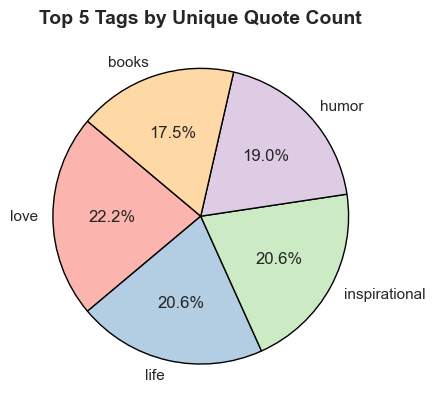

In [13]:
# Pie chart showing the proportion of top 5 tags.
top_5_tags=df.groupby('Tag')['Quote'].nunique().reset_index(name='Count').sort_values(by='Count', ascending=False).head(5)

plt.pie(
    top_5_tags['Count'],
    labels=top_5_tags['Tag'],
    autopct='%1.1f%%',    # show percentages
    startangle=140,       # rotate start angle
    colors=plt.cm.Pastel1.colors,  # nice color palette
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Top 5 Tags by Unique Quote Count', fontsize=14, fontweight='bold') 
plt.show()

### Insights:-
- Dominant themes: life, love, inspiration, humor, books.
- These are universally appealing topics, suggesting the dataset is valuable for general audiences.
- A good dataset to use for building a motivational app, daily quote website, or journaling app.

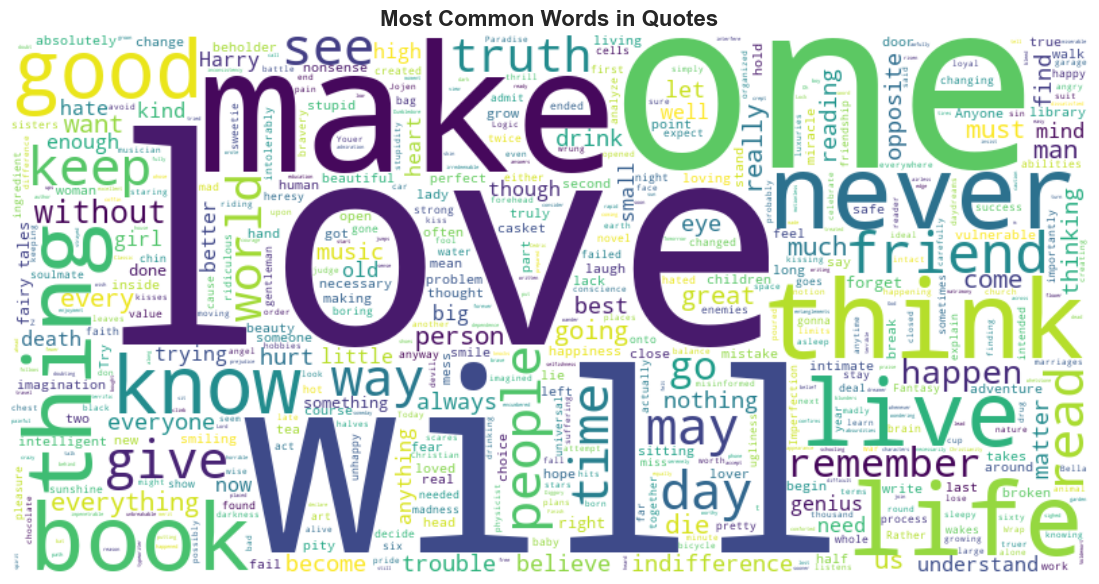

In [16]:
text = ' '.join(df['Quote'].unique())

# Optional: Add custom stopwords
# stopwords = set(STOPWORDS)

# Create word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    # stopwords=stopwords,
    colormap='viridis',        
    max_words=5000
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Quotes", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Insights:-
- Large words: love, life, will, one, make, think, good, thing, people, world, time, know, truth, etc.
- Common words hint at the core focus of the quotes: These words are the heartbeat of human existence, ever-present in our daily musings, dreams, and pursuits. They carry an aura of emotional depth, intellectual curiosity, and existential reflection, inviting us to reflect on our essence and the world around us.
- High frequency of positive or introspective language → inspiring and uplifting content: The high frequency of positive or introspective language creates a tapestry of hope, guiding us to question, dream, and transform our thoughts into tangible actions.(word like will suggests the same)

### Pragmatic interpretation:
- Think of apps like Headspace, Calm, or Medium—their backend databases store inspirational content, sort it by topic (e.g., love, truth), and personalize it based on user history.
- Apps like Reflectly, Replika, or Youper use emotionally tagged databases to build real-time conversations and self-reflection tools.
- Enables smart features like recommendations, journaling analysis, and content tagging.
- Keyword tracking reveals real-time user sentiment and trends.
- Converts emotional insight into real user value and revenue potential.

### Statistical Analysis

In [19]:
df['length_of_quote'].mean()

133.74137931034483

In [20]:
df['length_of_quote'].median()

90.0

<AxesSubplot:xlabel='length_of_quote', ylabel='Density'>

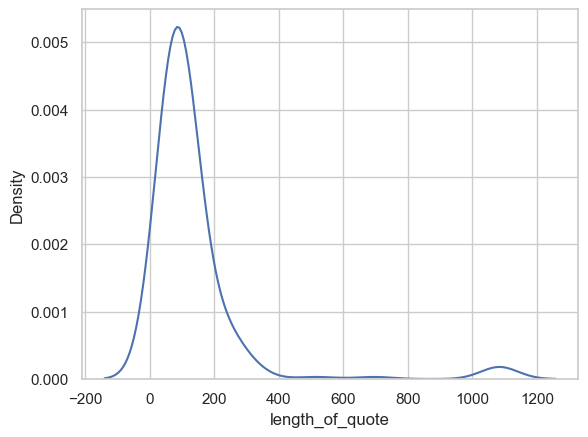

In [21]:
import seaborn as sns
sns.kdeplot(df['length_of_quote'])

In [22]:
df['length_of_quote'].skew()

4.603980521778321

In [23]:
df['length_of_quote'].std()

172.17735347862404

In [24]:
df['length_of_quote'].kurt()

22.362576944899637

### Statistical Summary:
- Mean: 133.74
- Median: 90.0
- Standard Deviation: 172.18
- Skewness: 4.60 (Highly Right Skewed)
- Kurtosis: 22.36 (Leptokurtic - heavy-tailed distribution)


### Interpretation:
- The KDE plot is leptokurtic, meaning the distribution has a sharp peak with heavy tails.
- It is positively skewed (right-skewed), indicating that a small number of very long quotes are pulling the mean higher.
- Mean > Median, which confirms the effect of skewness.
- The median remains a more reliable central measure due to its resistance to outliers.
